In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('../Project_4/data/model_data_3sec.csv')
df.head()

,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,5,6-000574.mp3,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,52306.024210,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock


In [3]:
# remove null values
df.dropna()

,Unnamed: 0,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,5,6-000574.mp3,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,52306.024210,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
71942,79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
71943,79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
71944,79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [4]:
df.drop('filename', axis =1)

,Unnamed: 0,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,3585.029860,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,5738.018893,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
2,3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,6252.910907,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
3,4,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,5554.903846,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
4,5,0.392290,0.079841,0.271375,0.001388,2767.550410,159341.482509,2663.721676,52306.024210,5940.845102,...,30.794027,-8.423706,22.058167,-0.152457,19.684511,-4.535352,17.765066,2.383680,14.638711,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71941,79935,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,703.804462,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
71942,79936,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,775.692233,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
71943,79937,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,887.664889,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
71944,79938,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,730.638146,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [5]:
df= df[df.columns.drop(list(df.filter(regex='var')))]

In [6]:
test_df = df.loc[(df['label']== 'Pop')|(df['label'] == 'Folk')]

In [7]:
# converting string labels into numbers
le = preprocessing.LabelEncoder()
X = test_df.drop(['label','filename'], axis = 1)
y = le.fit_transform(test_df.label.values)


In [8]:
#Spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.32709611, -1.14857939, -1.72576032, ..., -1.1978009 ,
         0.13673365, -0.43214003],
       [-0.09167976,  0.32387439, -0.26454364, ...,  0.17477938,
         0.00801446, -0.72174332],
       [ 0.84926165,  2.18903444, -0.44313747, ...,  0.80320016,
        -0.27636111,  0.03782666],
       ...,
       [-0.95589061, -1.08027269, -0.11167428, ..., -0.45320846,
        -1.60269073,  0.78545213],
       [ 0.91233359,  0.89086386, -0.52738466, ...,  0.21429558,
         1.50440524,  2.21480833],
       [-1.35917508,  1.15996565, -1.09461176, ...,  0.57087435,
         0.6519461 , -0.23301328]])

In [10]:
#Initializing the model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [11]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [12]:
#Making prediction 
prediction = classifier.predict(X_test_scaled)
prediction 

array([0, 1, 1, ..., 1, 0, 1])

In [13]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = classifier.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_true, y_pred)
cnf_matrix

array([[1742,  552],
       [ 505, 1712]], dtype=int64)

The dimension of this matrix is 2*2 because this model in this case is binary classification.We have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 1903 and 536 are actual predictions, and 607 and 1954 are incorrect predictions.

#### Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

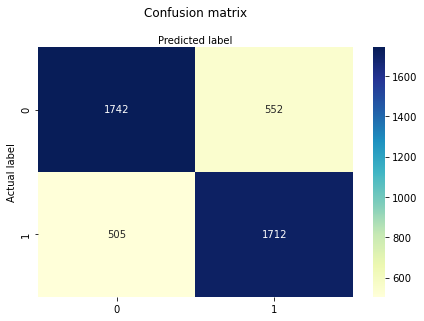

In [14]:
# Visualizing confusion matrix
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### Confusion Matrix Evaluation Metrics


In [23]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Training Data Score: 0.7645406843544453
Accuracy: 0.7656838838395035


The classification rate is increased to  77%, which is considered as a good accuracy

#### ROC Curve

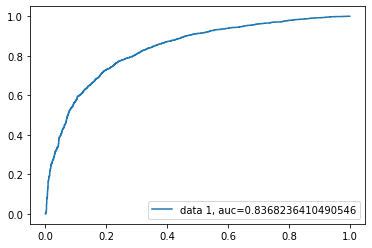

In [19]:
y_pred_proba = classifier.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.86

I used the Receiver Operating Characteristic(ROC) curve to plot the true positive rate against the false positive rate, and it's showing the tradeoff between sensitivity and specificity.

In [21]:
from joblib import dump, load
dump(classifier, 'Model/3_sec-model_lr1.joblib')

['Model/3_sec-model_lr1.joblib']